In [19]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
# Initialize the ImageDataGenerator class
datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    brightness_range = (0.5, 1.5)
)

In [8]:
# Returns a list of paths to all folders (videos) that meet the criteria specified by the input parameters
def select_videos(intensity, emotion, gender=None, ageRange=None):
  out = []
  list_dirs = os.walk(f"Emotions/{emotion}")

  for root, dirs, _ in list_dirs:
    for d in dirs:
      split_folder = d.split("_")
      if len(split_folder) != 5:
        continue
      if split_folder[4] != intensity:
        continue
      if gender is not None and split_folder[2] != gender:
        continue
      if ageRange is not None and ( int(split_folder[3]) > ageRange[1] or int(split_folder[3]) < ageRange[0] ):
        continue
        
      out.append(os.path.join(root, d).replace("\\", "/"))
      
  return out

In [9]:
# makes the assumption that the files are named frame_{frame_num} where frame_num starts at 0 and increases by 1
# the last frame is assumed to be one of the more expressive frames in the video, as actors start out in a neutral state and progress to a more expressive state
def last_frame(folder_path):
    for _, _, files in os.walk(folder_path):
        return f"{folder_path}/frame_{str(len(files) - 1)}.jpg"

In [12]:
videos = select_videos(intensity="HI", emotion="Disgust")

In [13]:
images = [] # the collection of images to augment

for video in videos:
    images.append(last_frame(video))

View an image

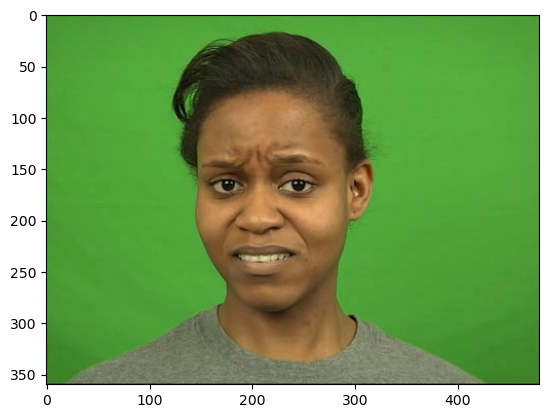

In [20]:
img = mpimg.imread(images[0])
plt.imshow(img)

For a single image, generate some augmented images

In [14]:
img = load_img(images[0]) # specify the image to augment here
img_as_arr = img_to_array(img)
x = img_as_arr.reshape((1,) + img_as_arr.shape)

In [15]:
i=0
num_images = 5 # number of new images to generate
for batch in datagen.flow(x, batch_size=1, save_to_dir='test', save_prefix='test_img', save_format='jpeg'):
    i += 1
    if i >= num_images:
        break

For a collection of images, generate augmented images

In [18]:
for image in images:
    im = load_img(image)
    x = img_to_array(im)
    x = x.reshape((1,) + x.shape)

    i = 0
    num_images = 5

    for batch in datagen.flow(x, batch_size=1, save_to_dir='Emotions/Disgust - Augmented/', save_prefix='img', save_format='jpeg'):
        i += 1
        if i >= num_images:
            break